In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [3]:
import sys
sys.path.append('../src')
from satellite_image import SatelliteImage
from utils import *
from plot_utils import *
from mappings import *
from labeler import RIL_BDTOPOLabeler
from labeled_satellite_image import SegmentationLabeledSatelliteImage

In [4]:
import s3fs
import matplotlib.pyplot as plt
import re

In [16]:
update_storage_access()

environment = get_environment()

root_path = get_root_path()

bucket = environment["bucket"]

path_s3_pleiades_data_2022_guyane = environment["sources"]["PLEIADES"][2022]["guyane"]
path_local_pleiades_data_2022_guyane = environment["local-path"]["PLEIADES"][2022]["guyane"]

path_local_bdtopo_data_guyane = environment["local-path"]["BDTOPO"][2022]["guyane"]
path_s3_bdtopo_data_guyane = environment["sources"]["BDTOPO"][2022]["guyane"]

#martinique 2022
path_s3_pleiades_data_2022_martinique = environment["sources"]["PLEIADES"][2022]["martinique"]
path_local_pleiades_data_2022_martinique = environment["local-path"]["PLEIADES"][2022]["martinique"]

path_local_bdtopo_data_martinique = environment["local-path"]["BDTOPO"][2022]["martinique"]
path_s3_bdtopo_data_martinique = environment["sources"]["BDTOPO"][2022]["martinique"]

fs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"})



In [7]:
fs.download(
        rpath=f"{bucket}/{path_s3_pleiades_data_2022_guyane}",
        lpath=f"../{path_local_pleiades_data_2022_guyane}",
        recursive=True)

fs.download(
        rpath=f"{bucket}/{path_s3_bdtopo_data_guyane}",
        lpath=f"../{path_local_bdtopo_data_guyane}",
        recursive=True
)

In [36]:
# DL PLEIADE martinique 2022
fs.download(
        rpath=f"{bucket}/{path_s3_pleiades_data_2022_martinique}",
        lpath=f"../{path_local_pleiades_data_2022_martinique}",
        recursive=True)

In [17]:
fs.download(
        rpath=f"{bucket}/{path_s3_bdtopo_data_martinique}",
        lpath=f"../{path_local_bdtopo_data_martinique}",
        recursive=True
)

In [6]:
filename = '../data/PLEIADES/2022/GUYANE/ORT_2022072050325085_0353_0545_U22N_16Bits.jp2'
date = datetime.strptime(re.search(r'ORT_(\d{8})', filename).group(1), '%Y%m%d')

In [7]:
image = SatelliteImage.from_raster(
        filename,
        date = date, 
        n_bands = 4,
        dep = '973'
    )
image.normalize()

In [8]:
labeler_RIL_BDTOPO = RIL_BDTOPOLabeler(date, '973')

In [9]:
mask_RIL_BDTOPO = labeler_RIL_BDTOPO.create_segmentation_label(image)

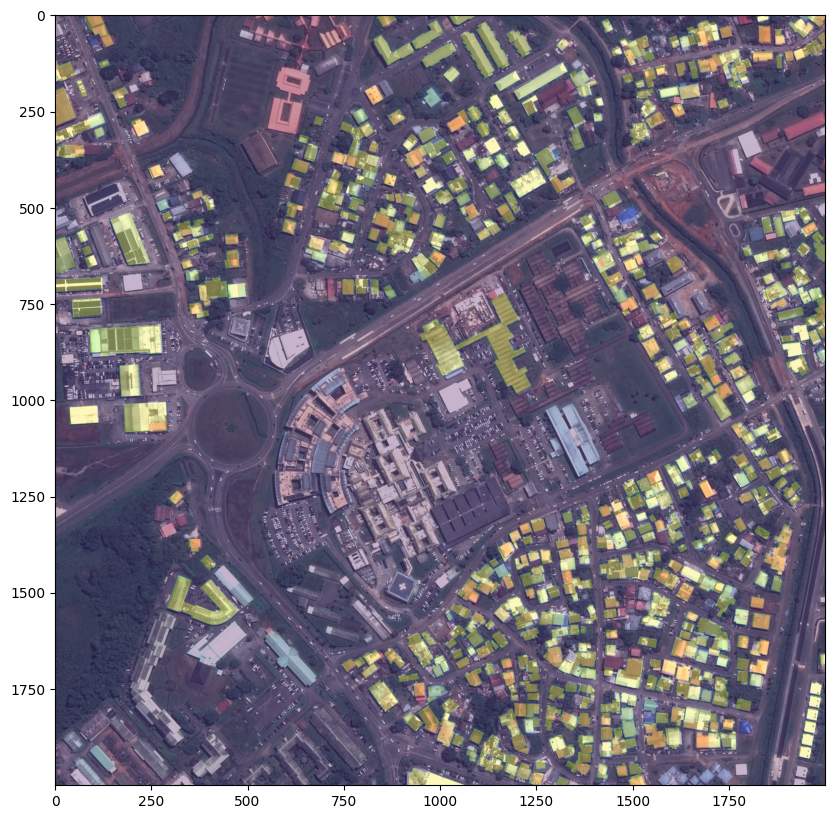

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(np.transpose(image.array, (1, 2, 0))[:,:,:3])
ax.imshow(mask_RIL_BDTOPO, alpha=0.3)

In [11]:
filename_1 = '../data/PLEIADES/2022/MARTINIQUE/ORT_2022_0711_1619_U20N_8Bits.jp2'
date_1 = date.fromisoformat('2022-01-01')

In [12]:
image_1 = SatelliteImage.from_raster(
        filename_1,
        date = date_1, 
        n_bands = 3,
        dep = '972'
    )
image_1.normalize()

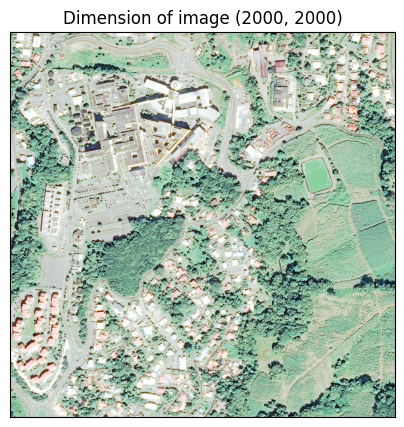

In [47]:
image_1.plot([0,1,2])

In [21]:
labeler_RIL_BDTOPO_1 = RIL_BDTOPOLabeler(date_1, '972')

In [22]:
mask_RIL_BDTOPO_1 = labeler_RIL_BDTOPO_1.create_segmentation_label(image_1)

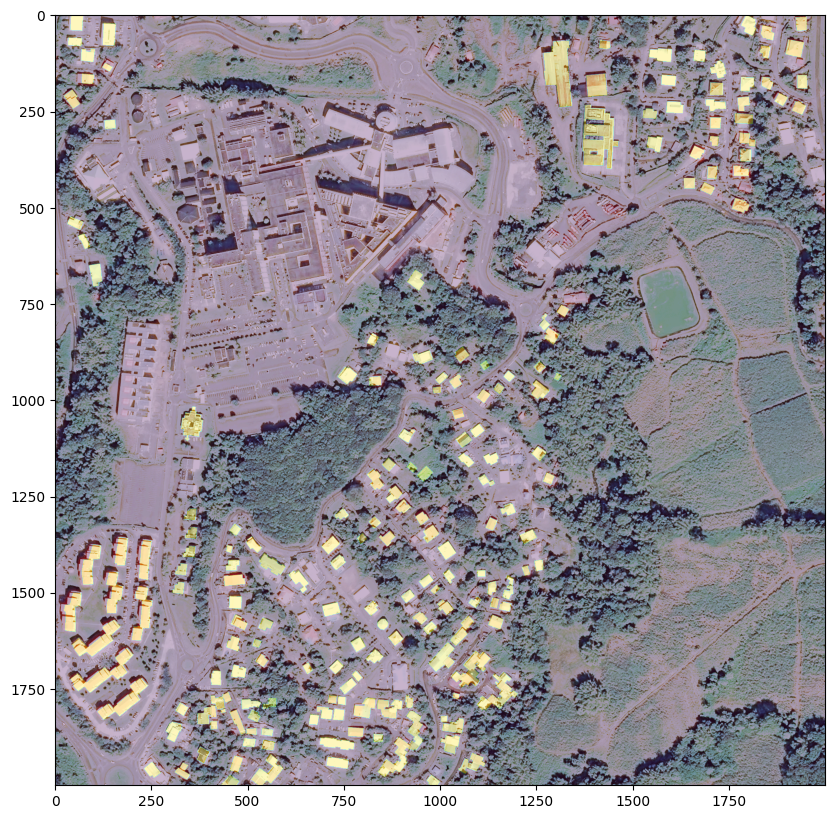

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(np.transpose(image_1.array, (1, 2, 0))[:,:,:3])
ax.imshow(mask_RIL_BDTOPO, alpha=0.3)